<a href="https://colab.research.google.com/github/Nikhilreddy301/Data-science/blob/master/gender_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 
from sklearn import svm

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Indian-Female-Names.csv to Indian-Female-Names.csv
Saving Indian-Male-Names.csv to Indian-Male-Names.csv


In [0]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['Indian-Female-Names.csv']))

In [0]:
df = pd.read_csv(io.BytesIO(uploaded['Indian-Male-Names.csv']))

In [7]:
df.head

<bound method NDFrame.head of                       name gender    race
0                  barjraj      m  indian
1             ramdin verma      m  indian
2          sharat chandran      m  indian
3          birender mandal      m  indian
4                     amit      m  indian
...                    ...    ...     ...
14840               buddha      m  indian
14841               mukesh      m  indian
14842                 monu      m  indian
14843  govind prasad shahu      m  indian
14844               deepak      m  indian

[14845 rows x 3 columns]>

In [8]:
df2.head(10)

,name,gender,race
0,shivani,f,indian
1,isha,f,indian
2,smt shyani devi,f,indian
3,divya,f,indian
4,mansi,f,indian
5,mazida,f,indian
6,pooja,f,indian
7,kajal,f,indian
8,meena,f,indian
9,sonam,f,indian


In [0]:
male = (df.assign( firstname = lambda x : x.name.str.split(' ').str[0],
    tri_last = lambda x : x.firstname.str[-3:],
    bi_last = lambda x : x.firstname.str[-2:]))

In [0]:
female= (df2.assign( firstname = lambda x : x.name.str.split(' ').str[0],
        tri_last= lambda x : x.firstname. str[-3:], 
        bi_last = lambda x : x.firstname. str[-2:]))

In [11]:
male.head(5)

,name,gender,race,firstname,tri_last,bi_last
0,barjraj,m,indian,barjraj,raj,aj
1,ramdin verma,m,indian,ramdin,din,in
2,sharat chandran,m,indian,sharat,rat,at
3,birender mandal,m,indian,birender,der,er
4,amit,m,indian,amit,mit,it


In [12]:
female.head()

,name,gender,race,firstname,tri_last,bi_last
0,shivani,f,indian,shivani,ani,ni
1,isha,f,indian,isha,sha,ha
2,smt shyani devi,f,indian,smt,smt,mt
3,divya,f,indian,divya,vya,ya
4,mansi,f,indian,mansi,nsi,si


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


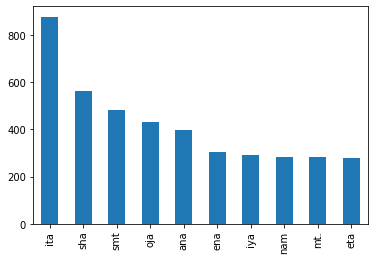

In [13]:
female['tri_last'].value_counts().head(10).plot('bar')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


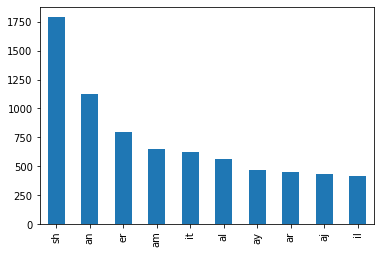

In [14]:
male['bi_last'].value_counts().head(10).plot('bar')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


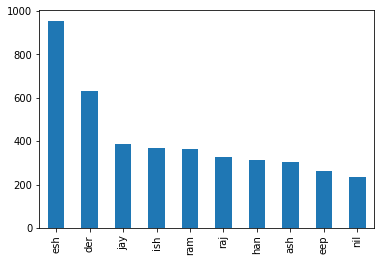

In [15]:
male['tri_last'].value_counts().head(10).plot('bar')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


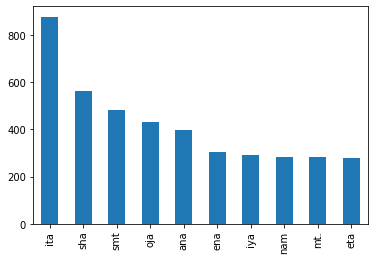

In [16]:
female['tri_last'].value_counts().head(10).plot('bar')

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import re
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle
import nltk
from nltk import word_tokenize
from sklearn import tree, metrics, model_selection, preprocessing
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [22]:
female.isna().sum()
#na is too less and hence dropping the na 

name         31
gender        0
race          0
firstname    31
tri_last     31
bi_last      31
dtype: int64

In [23]:
male.isna().sum()
#na is too less and hence dropping the na 

name         24
gender        0
race          0
firstname    24
tri_last     24
bi_last      24
dtype: int64

In [0]:
female.dropna(inplace=True)
male.dropna(inplace=True)

In [26]:
#checking the once again for the nan 
male.isna().sum()
female.isna().sum()
#there are no nan values and we are ready to the data preparation  

name         0
gender       0
race         0
firstname    0
tri_last     0
bi_last      0
dtype: int64

In [0]:
tlist=[male,female]
final= pd.concat(tlist, ignore_index=True,verify_integrity=False)

In [31]:
final.head
# crossing checking both the csv is included

<bound method NDFrame.head of                             name gender    race firstname tri_last bi_last
0                        barjraj      m  indian   barjraj      raj      aj
1                   ramdin verma      m  indian    ramdin      din      in
2                sharat chandran      m  indian    sharat      rat      at
3                birender mandal      m  indian  birender      der      er
4                           amit      m  indian      amit      mit      it
...                          ...    ...     ...       ...      ...     ...
30167                 saroj devi      f  indian     saroj      roj      oj
30168              naina @ geeta      f  indian     naina      ina      na
30169  manju d/0 baboo lal jatav      f  indian     manju      nju      ju
30170                    shivani      f  indian   shivani      ani      ni
30171                      nayna      f  indian     nayna      yna      na

[30172 rows x 6 columns]>

In [0]:
  def processWordList(words_list):
    final_words_list = []
    for word in words_list:
        word = str(word)
        if len(word) < 1:
            final_words_list.append(word)
        else:
            word = word.lower()
            word = re.sub('[ @$/#.-:&*+=\[\]?!(){},''">_<;%\n\r]', " ", word)
            word = re.sub(r'[^a-zA-Z0-9]', ' ', word)
            word = re.sub( '\s+', ' ', word).strip()
            final_words_list.append(word)
    return final_words_list

In [0]:
#Convert the names into sensible format/words cleaning
names = final["firstname"].tolist()
first_names = []
processed_names = processWordList(names)
for name in processed_names:
    name = name.split(" ")
    if len(name)<1:
        first_names.append(np.nan)
    elif len(name) == 1:
        first_names.append(name[0])
    else:
        if len(name[0]) <= 3:
            first_names.append("".join(name[0:-1]))
        else:
            first_names.append(name[0])

In [0]:
final_names = []
for name in first_names:
    if len(name) <= 2:
        final_names.append(np.nan)
    else:
        final_names.append(name)

In [0]:
#replace the class type of gender column; gender : male = 0 and female = 1
df["gender"] = (df["gender"]=="f").astype(int)

,name,gender,race,tri_last,bi_last,first name
0,barjraj,m,indian,raj,aj,barjraj
1,ramdin verma,m,indian,din,in,ramdin
2,sharat chandran,m,indian,rat,at,sharat
3,birender mandal,m,indian,der,er,birender
4,amit,m,indian,mit,it,amit


In [49]:
final.gender[final.gender == 'm'] = 0
final.gender[final.gender == 'f'] = 1
print(final)

                            name gender    race tri_last bi_last first name
0                        barjraj      0  indian      raj      aj    barjraj
1                   ramdin verma      0  indian      din      in     ramdin
2                sharat chandran      0  indian      rat      at     sharat
3                birender mandal      0  indian      der      er   birender
4                           amit      0  indian      mit      it       amit
...                          ...    ...     ...      ...     ...        ...
30167                 saroj devi      1  indian      roj      oj      saroj
30168              naina @ geeta      1  indian      ina      na      naina
30169  manju d/0 baboo lal jatav      1  indian      nju      ju      manju
30170                    shivani      1  indian      ani      ni    shivani
30171                      nayna      1  indian      yna      na      nayna

[30172 rows x 6 columns]


In [0]:
def myfeatures(name):
    name = name.lower()
    return {
        "first_letter": name[0],
        "first_two_letters": name[0:2],
        "first_three_letters": name[0:3],
        "last_three_letters": name[-3:],
        "last_two_letters": name[-2:],
        "last_letter": name[-1],
    }

In [0]:
myfeatures = np.vectorize(myfeatures)

In [0]:
final_matrix = final.as_matrix()
X = myfeatures(final_matrix[:,0])
Y = final_matrix[:,1].astype(np.int)
X, Y = shuffle(X, Y)

In [60]:
final_matrix = final.as_matrix()
X = myfeatures(final_matrix[:,0])
Y = final_matrix[:,1].astype(np.int)
X,Y = shuffle(X, Y)

X_train = X[:round(len(X)*.6)]
Y_train = Y[:round(len(X)*.6)]
X_cv = X[round(len(X)*.6):round(len(X)*.8)]
Y_cv = Y[round(len(X)*.6):round(len(X)*.8)]
X_test = X[round(len(X)*.8):]
Y_test = Y[round(len(X)*.8):]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [61]:
vect = DictVectorizer()
dtc = DecisionTreeClassifier()
model = Pipeline([('dict', vect), ('dtc', dtc)])
model.fit(X_train, Y_train)
prediction = model.predict(X_cv)
accuracy = np.mean((prediction == Y_cv.ravel()))
accuracy = round(accuracy, 4)
print("Accuracy of the Dicision Tree Classifier (on CV data set):\n", 100*(accuracy), "%") 

Accuracy of the Dicision Tree Classifier (on CV data set):
 88.25 %


In [0]:
#Model (Giving a name it returns the gender for that name)
def getGender(name):
    name = myfeatures(name)
    return(model.predict(name))

In [70]:
getGender(["Amit", "ratnamma", "vidya", "adam", "dhanush", "nikhil"])

array([0, 1, 1, 0, 0, 0])

In [79]:
vect = DictVectorizer()
adb = AdaBoostClassifier()
model = Pipeline([('dict', vect), ('adb', adb)])
model.fit(X_train, Y_train)
prediction = model.predict(X_cv)
accuracy = np.mean((prediction == Y_cv.ravel()))
accuracy = round(accuracy, 3)
print("Accuracy of the ada boost (on CV data set):\n", 100*(accuracy), "%") 

Accuracy of the ada boost (on CV data set):
 84.1 %


In [84]:
vect = DictVectorizer()
xgb = XGBClassifier()
model = Pipeline([('dict', vect), ('xgb', xgb)])
model.fit(X_train, Y_train)
prediction = model.predict(X_cv)
accuracy = np.mean((prediction == Y_cv.ravel()))
accuracy = round(accuracy, 5)
print("Accuracy of the XG boost (on CV data set):\n", 100*(accuracy), "%") 

Accuracy of the XG boost (on CV data set):
 84.22500000000001 %


In [0]:
vect = DictVectorizer()
LR = LogisticRegression()
model = Pipeline([('dict', vect), ('LR', LR)])
model.fit(X_train, Y_train)
#prediction = model.predict(X_cv)
#accuracy = np.mean((prediction == Y_cv.ravel()))
#accuracy = round(accuracy, 5)
print("Accuracy of the Logstic regression  (on CV data set):\n", 100*(accuracy), "%") 

Accuracy of the Logstic regression  (on CV data set):
 84.22500000000001 %


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
